In [2]:
from scipy import fft
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [25]:
f_carrier  = 400
f_message = 50

timezone = np.linspace(-20, 20, 1000)

In [26]:
sig_message = np.sin(2*np.pi * f_message * timezone)
sig_carrier  = np.sin(2*np.pi * f_carrier  * timezone)

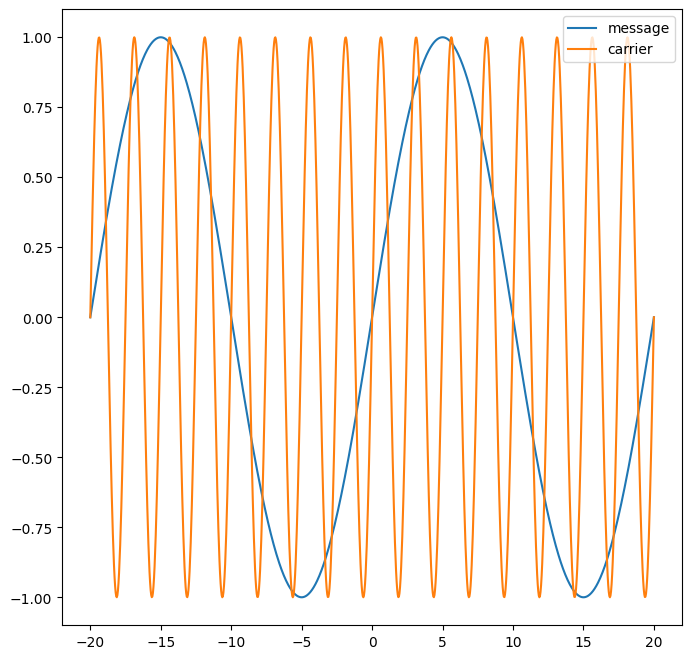

In [27]:
figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot()
ax.plot(timezone, sig_message)
ax.plot(timezone, sig_carrier)
ax.legend(["message", "carrier"])
plt.show()

AM Modulateion

$$AM = (1+ \frac{m(t)}{A}) \cdot A \sin(2 \pi f_s t + \phi)$$


$M := max(m(t))$, $A := max(s(t))$, 
$$ m := \frac{M}{A}$$

$m$ is a modulate sensitivity

In [28]:
A = np.max(np.abs(sig_carrier))
M = np.max(np.abs(sig_message))
m = M/A

In [29]:
signal_am = (1 + sig_message/A)*sig_carrier

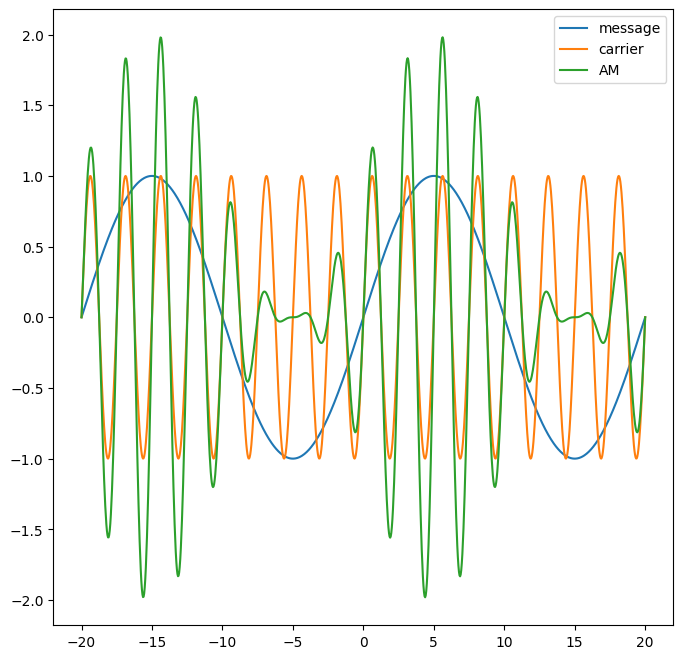

In [30]:
figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot()
ax.plot(timezone, sig_message)
ax.plot(timezone, sig_carrier)
ax.plot(timezone, signal_am)
ax.legend(["message", "carrier", "AM"])
plt.show()

Demodulation with product detector and low pass filter

In [31]:
ft_car = 2*np.pi * f_carrier *timezone
signal_y = signal_am * (np.sin(ft_car ) *np.power(np.cos(ft_car ), 2))

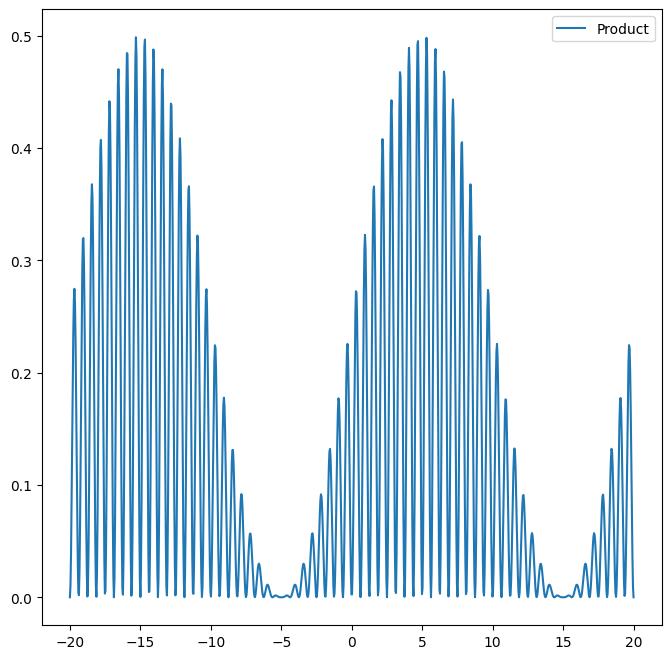

In [32]:
figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot()
ax.plot(timezone, signal_y)
ax.legend(["Product"])
plt.show()

C:\Users\qwqwh\AppData\Local\Temp\ipykernel_17316\2922246649.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


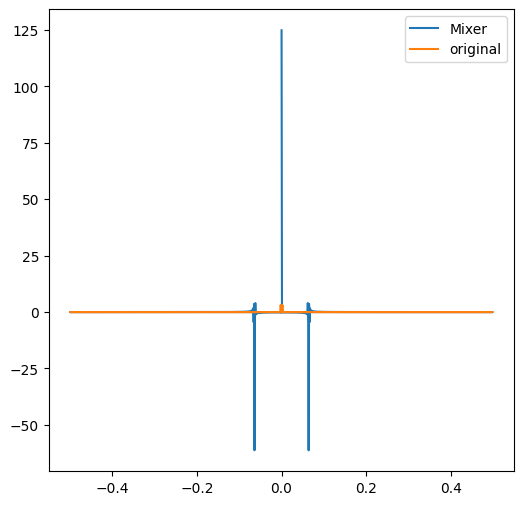

In [41]:
# Fourier Transform
sampling_rate = len(signal_y)/1000
fft_y = fft.fft(signal_y)
fft_message = fft.fft(sig_message)
freq = fft.fftfreq(len(signal_y), sampling_rate)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()
ax.plot(freq, fft_y)
ax.plot(freq, fft_message)
ax.legend(["Mixer", "original"])
fig.show()